# Clusters par abstracts
## 1. Pre-processing

In [30]:
import joblib
import numpy as np
import pandas as pd
import scipy
import sklearn

data_folder = "data"
df_hover = joblib.load(data_folder + "/df_hover.pkl")

for title in df_hover['Abstract']:
    print(title)

Pre-exposure prophylaxis (PrEP) reduces HIV acquisition risk by >90% and is a critical lever to reduce HIV incidence. Identifying individuals most likely to benefit from PrEP and retaining them on PrEP throughout HIV risk is critical to realize PrEP's prevention potential. Individuals with sexually transmitted infections (STIs) are an obvious priority PrEP population, but there are no data from sub-Saharan Africa (SSA) confirming the effectiveness of integrating PrEP into STI clinics. Assisted partner notification may further enhance STI clinic-based PrEP programming by recruiting PrEP users from the pool of named sexual partners of individuals presenting with an incident STI. However, the acceptability, feasibility, and effectiveness of these integrated and enhanced strategies are unknown.
This study aims to describe the implementation outcomes of acceptability, feasibility, and effectiveness (regarding PrEP uptake and persistence) of integrating an enhanced PrEP implementation strate

In [2]:
import nltk
import re

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

stopwords = set(nltk.corpus.stopwords.words('english'))
# stemmer = nltk.stem.snowball.SnowballStemmer('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

def penn_to_wn(tag):
    if tag in ['JJ', 'JJR', 'JJS']:
        return nltk.corpus.wordnet.ADJ
    elif tag in ['NN', 'NNS', 'NNP', 'NNPS']:
        return nltk.corpus.wordnet.NOUN
    elif tag in ['RB', 'RBR', 'RBS']:
        return nltk.corpus.wordnet.ADV
    elif tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
        return nltk.corpus.wordnet.VERB
    else:
        return nltk.corpus.wordnet.NOUN

def lemmatization(word):
    new_form = lemmatizer.lemmatize(word, pos = penn_to_wn(nltk.pos_tag([word])[0][1]))
    nouns = set()
    for lemma in nltk.corpus.wordnet.lemmas(new_form):
        if nltk.pos_tag([lemma.name()])[0][1] == "NN" and (bool(re.search(r'ion$', lemma.name())) or bool(re.search(r'ment$', lemma.name())) or bool(re.search(r'ion$', lemma.name())) or bool(re.search(r'y$', lemma.name())) or bool(re.search(r'x$', lemma.name())) or bool(re.search(r'k$', lemma.name())) or bool(re.search(r'lt$', lemma.name())) or bool(re.search(r'ence$', lemma.name())) or bool(re.search(r'ness$', lemma.name())) or bool(re.search(r'ant$', lemma.name())) or bool(re.search(r'ure$', lemma.name())) or bool(re.search(r'ude$', lemma.name())) or bool(re.search(r'is$', lemma.name())) or bool(re.search(r'ood$', lemma.name())) or bool(re.search(r'end$', lemma.name())) or bool(re.search(r'age$', lemma.name()))) and not (bool(re.search(r'hood$', lemma.name())) or bool(re.search(r'oody$', lemma.name())) or bool(re.search(r'ist$', lemma.name())) or bool(re.search(r'r$', lemma.name()))):
            nouns.add(lemma.name())
        for related_lemma in lemma.derivationally_related_forms():
            if nltk.pos_tag([related_lemma.name()])[0][1] == "NN" and (bool(re.search(r'ion$', related_lemma.name())) or bool(re.search(r'ment$', related_lemma.name())) or bool(re.search(r'ion$', related_lemma.name())) or bool(re.search(r'y$', related_lemma.name())) or bool(re.search(r'x$', related_lemma.name())) or bool(re.search(r'k$', related_lemma.name())) or bool(re.search(r'lt$', related_lemma.name())) or bool(re.search(r'ence$', related_lemma.name())) or bool(re.search(r'ness$', related_lemma.name())) or bool(re.search(r'ant$', related_lemma.name())) or bool(re.search(r'ure$', related_lemma.name())) or bool(re.search(r'ude$', related_lemma.name())) or bool(re.search(r'is$', related_lemma.name())) or bool(re.search(r'ood$', related_lemma.name())) or bool(re.search(r'end$', related_lemma.name())) or bool(re.search(r'age$', related_lemma.name()))) and not (bool(re.search(r'hood$', related_lemma.name())) or bool(re.search(r'ist$', related_lemma.name())) or bool(re.search(r'oody$', related_lemma.name())) or bool(re.search(r'r$', related_lemma.name()))):
                nouns.add(related_lemma.name())
    nouns_list = list(nouns)
    if len(nouns_list) == 0:
        return new_form
    else:
        return lemmatizer.lemmatize(nouns_list[0], pos = penn_to_wn(nltk.pos_tag([nouns_list[0]])[0][1]))

bag_of_tokens = []

for title in df_hover['Abstract']:
    keywords = []
    keywords.extend([lemmatization(word) for word in nltk.word_tokenize(title.strip().lower(), "english") if word.isalpha() and word not in stopwords])
    bag_of_tokens.append(" ".join(keywords))

bag_of_tokens

['prophylaxis prep reduces hiv acquisition risk crisis leverage reduction hiv incidence identification individuality likeliness benefit prep retention prep throughout hiv risk crisis realization prep prevention potentiality individuality sexually transmission infection stis obviousness priority prep population data africa ssa confirmation effectiveness integration prep sti clinic assistant partner notification may enhancement sti prep program recruiting prep user pool name sex partner individuality presentment incidence sti however acceptability feasibility effectiveness integration enhancement strategy unknown study aim description implement outcome acceptability feasibility effectiveness regard prep uptake persistence integration enhancement prep implement strategy sti clinic malawi enhancement prep sti study prospective cohort study enrolment patience eligibility prep age year seek sti service sti clinic data collection relies combination interview patience clinic staff survey clini

## 2. Calcul du TF-IDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# créer un vecteur tf_idf
tf_idf = TfidfVectorizer()
 
# valeurs tf_idf
result = tf_idf.fit_transform(bag_of_tokens)

In [4]:
# valeurs idf
print('idf values:')
for ele1, ele2 in zip(tf_idf.get_feature_names_out(), tf_idf.idf_):
    print(ele1, ':', ele2)

idf values:
aa : 6.755742213586912
ab : 5.3694478524670215
ababa : 6.755742213586912
abacavir : 6.755742213586912
abandonment : 6.350277105478748
abbott : 5.251664816810639
abc : 6.755742213586912
abdomen : 6.350277105478748
abdominal : 6.755742213586912
abidjan : 5.657129924918802
ability : 3.760009940032921
abnormality : 4.963982744358857
abon : 6.755742213586912
abroad : 6.350277105478748
abrogation : 6.755742213586912
abruptness : 6.755742213586912
absence : 4.2708355637989115
absenteeism : 6.755742213586912
absoluteness : 5.839451481712757
absorbance : 6.755742213586912
abstention : 6.755742213586912
abstinence : 6.062595033026967
abstraction : 5.839451481712757
abundant : 6.755742213586912
abuse : 6.062595033026967
ac : 6.350277105478748
academy : 6.755742213586912
acceleration : 5.251664816810639
acceptability : 4.357846940788542
acceptant : 5.251664816810639
accepted : 5.251664816810639
accessibility : 5.657129924918802
accession : 3.5776883832389665
accessory : 6.7557422135869

In [5]:
# les indexes des mots
print('Word indexes:')
print(tf_idf.vocabulary_)

Word indexes:
{'prophylaxis': 3844, 'prep': 3739, 'reduces': 4051, 'hiv': 2122, 'acquisition': 57, 'risk': 4214, 'crisis': 1053, 'leverage': 2670, 'reduction': 4052, 'incidence': 2318, 'identification': 2215, 'individuality': 2346, 'likeliness': 2685, 'benefit': 456, 'retention': 4175, 'throughout': 4868, 'realization': 4001, 'prevention': 3768, 'potentiality': 3693, 'sexually': 4405, 'transmission': 4958, 'infection': 2362, 'stis': 4624, 'obviousness': 3322, 'priority': 3784, 'population': 3664, 'data': 1124, 'africa': 123, 'ssa': 4578, 'confirmation': 912, 'effectiveness': 1443, 'integration': 2433, 'sti': 4614, 'clinic': 766, 'assistant': 339, 'partner': 3482, 'notification': 3284, 'may': 2856, 'enhancement': 1531, 'program': 3816, 'recruiting': 4043, 'user': 5170, 'pool': 3659, 'name': 3131, 'sex': 4404, 'presentment': 3751, 'however': 2164, 'acceptability': 28, 'feasibility': 1752, 'strategy': 4635, 'unknown': 5114, 'study': 4655, 'aim': 146, 'description': 1223, 'implement': 2294

In [6]:
# afficher les valeurs tf-idf
print('tf-idf value:')
print(result)

tf-idf value:
  (0, 2175)	0.036925213186693034
  (0, 1895)	0.02538785016730649
  (0, 1226)	0.022892292113539835
  (0, 2080)	0.025595193477184922
  (0, 1791)	0.02121214354653902
  (0, 4590)	0.022365036480786315
  (0, 1087)	0.023776063394755336
  (0, 2802)	0.0249925086669492
  (0, 4765)	0.03833624010066205
  (0, 1617)	0.035772320252445734
  (0, 2378)	0.027006220391153937
  (0, 4044)	0.0249925086669492
  (0, 197)	0.012967574189136218
  (0, 2416)	0.031389270321799834
  (0, 1794)	0.017209155033747345
  (0, 3872)	0.01749533076407541
  (0, 4999)	0.019236872089034865
  (0, 1891)	0.026748086411432215
  (0, 2319)	0.01389009106275753
  (0, 2478)	0.017554153554756684
  (0, 3734)	0.036925213186693034
  (0, 1632)	0.021318421752433852
  (0, 2299)	0.02023738645962413
  (0, 1926)	0.023318750605190532
  (0, 4127)	0.01698918835427178
  :	:
  (630, 2478)	0.0408676050836505
  (630, 1640)	0.09596124563862041
  (630, 872)	0.058637749563508076
  (630, 5167)	0.02276311366057494
  (630, 3033)	0.0359930795572972

In [7]:
# sous forme matricielle
print('tf-idf values in matrix form:')
tfidf_matrix = result.toarray()
print(tfidf_matrix)

tf-idf values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
tfidf_matrix[630][582] # la valeur du mot "HIV" dans l'abstract du dernier article

0.0

## 3. Calcul du Singular-Value Decomposition (SVD)
## Latent Semantic Indexing

In [39]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2) # on définit le SVD
svd.fit(tfidf_matrix) # on introduit la matrice
truncated_tfidf_matrix = svd.transform(tfidf_matrix)
print(truncated_tfidf_matrix)

[[ 0.17463025 -0.05961566]
 [ 0.09339271  0.16727474]
 [ 0.16475986  0.0486627 ]
 ...
 [ 0.2791554  -0.01904742]
 [ 0.16739643  0.00459276]
 [ 0.32905012 -0.09261019]]


In [40]:
truncated_tfidf_matrix[630]

array([ 0.32905012, -0.09261019])

In [41]:
truncated_tfidf_matrix[82]

array([0.13858226, 0.03927098])

## 4. Clustering avec K-Means

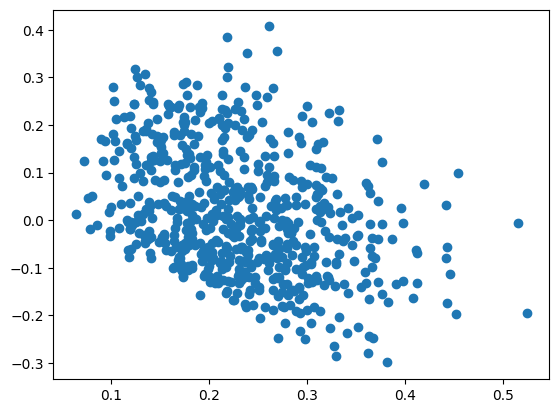

In [42]:
import matplotlib.pyplot as plt

x = []
y = []

for document in truncated_tfidf_matrix:
    x.append(document[0])
    y.append(document[1])

plt.scatter(x, y)
plt.savefig("abstracts-plot-before-clustering.png")
plt.show()

C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: Fut

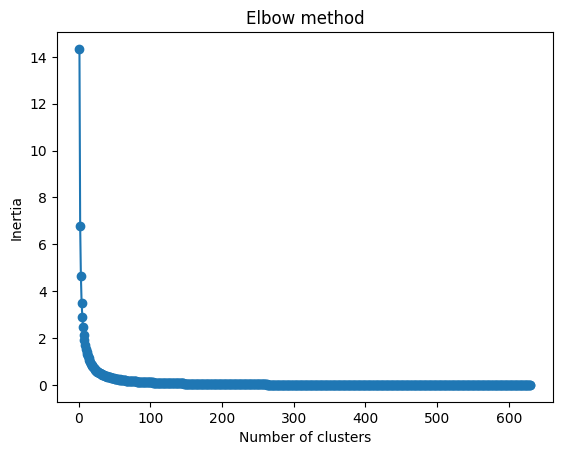

In [43]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1, 631):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 631), inertias, marker = 'o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig("abstracts-inertia.png")
plt.show()

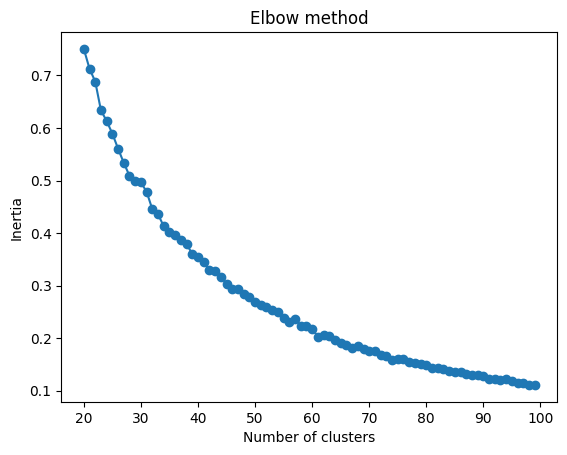

In [44]:
plt.plot(range(20, 100), inertias[19:99], marker = 'o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: Fut

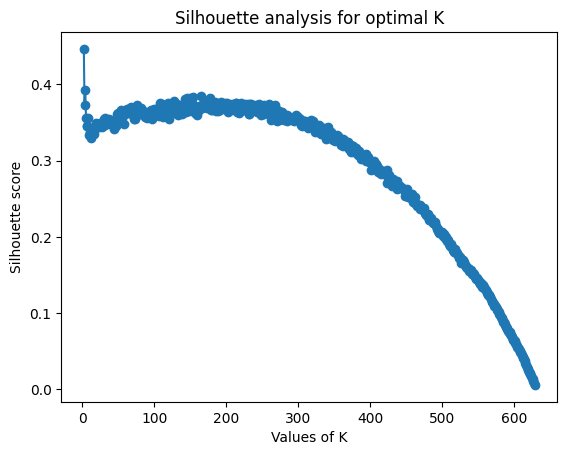

In [45]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for nb_clusters in range(2, 630):
    # on initialise KMeans
    kmeans = KMeans(n_clusters=nb_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_

    # calcul du score de silhouette
    silhouette_scores.append(silhouette_score(data, cluster_labels))

plt.plot(range(2, 630), silhouette_scores, marker = 'o')
plt.title('Silhouette analysis for optimal K')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.savefig("abstracts-silhouette-analysis.png")
plt.show()

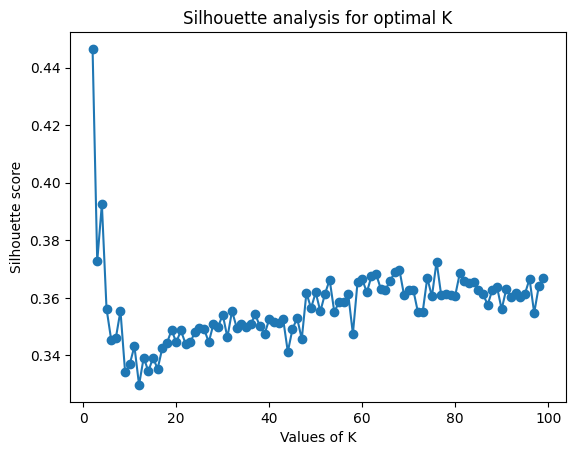

In [46]:
plt.plot(range(2, 100), silhouette_scores[:98], marker = 'o')
plt.title('Silhouette analysis for optimal K')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.show()

In [47]:
np.array(silhouette_scores[1:25]).argmax()+2

3

C:\Users\Nikita\.virtualenvs\Projet de recherche\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


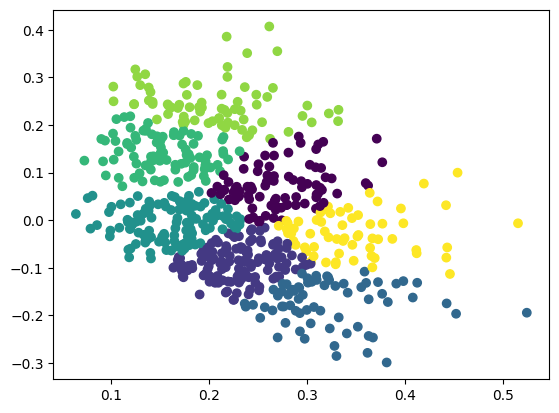

In [51]:
k = 7
kmeans = KMeans(n_clusters = k)
kmeans.fit(data)

plt.scatter(x, y, c = kmeans.labels_)
plt.savefig("abstracts-plot-after-clustering.png")
plt.show()

In [53]:
clustered_documents = []
for cluster in range(0, k):
    points = np.array(data)[kmeans.labels_ == cluster]
    print("Cluster n°" + str(cluster) + ": (" + str(len(points)) + " documents)")
    document_in_cluster = []
    for point in points:
        index = np.where(truncated_tfidf_matrix == point)[0][0]
        print("Doc ID " + str(index) + " : " + str(point))
        document_in_cluster.append(index)
    print("\n")
    clustered_documents.append(document_in_cluster)

Cluster n°0: (86 documents)
Doc ID 8 : [0.28571782 0.08452132]
Doc ID 13 : [0.23981993 0.05261611]
Doc ID 33 : [0.23509448 0.1079445 ]
Doc ID 50 : [0.26569107 0.00474378]
Doc ID 60 : [0.28081896 0.14208373]
Doc ID 63 : [0.30265633 0.11654667]
Doc ID 64 : [ 2.74010509e-01 -1.12291400e-04]
Doc ID 67 : [0.23553362 0.13359541]
Doc ID 91 : [0.30928226 0.07392822]
Doc ID 94 : [0.25153159 0.04945301]
Doc ID 95 : [ 0.25076691 -0.00411662]
Doc ID 104 : [0.29460483 0.06928878]
Doc ID 105 : [0.22796703 0.07039381]
Doc ID 113 : [0.3111208  0.05606412]
Doc ID 114 : [0.26612334 0.13590258]
Doc ID 115 : [0.25019781 0.11774042]
Doc ID 127 : [0.30897871 0.02433928]
Doc ID 147 : [0.24077157 0.04404994]
Doc ID 173 : [0.27347337 0.02621387]
Doc ID 180 : [0.25757728 0.00918375]
Doc ID 189 : [0.27883688 0.03174825]
Doc ID 192 : [0.2261246  0.04199387]
Doc ID 198 : [0.24940059 0.10288675]
Doc ID 217 : [0.23899667 0.07047901]
Doc ID 218 : [0.2199651  0.04343283]
Doc ID 221 : [0.36226199 0.07276294]
Doc ID 226

## 5. Sélection des meilleurs phrases dans les abstracts des mots clusterisés
- Pre-processing des abstracts
- Identification des mots-clés avec TF-IDF et SDV
- Calcul du score pour chaque phrase dans le cluster
- Sélection de la phrase avec le meilleur score

In [56]:
nb = 0
for cluster in clustered_documents:
    nb += 1
    print("Cluster n°" + str(nb))
    titles = df_hover['Title'].loc[cluster]
    for title in titles:
        print(title)
    print("\n")

Cluster n°1
Prevalence of drug resistant HIV-1 forms in patients without any history of antiretroviral therapy in the Republic of Guinea.
Quantitative interpretation of Sedia LAg Assay test results after HIV diagnosis.
Expression of type I interferon-associated genes at antiretroviral therapy interruption predicts HIV virological rebound.
Virologic Response to Very Early HIV Treatment in Neonates.
A Novel Sample Selection Approach to Aid the Identification of Factors That Correlate With the Control of HIV-1 Infection.
New infections and HIV-1 subtypes among febrile persons and blood donors in Oyo State, Nigeria.
Brief Report: Herpes Simplex Virus Type-2 Shedding and Genital Ulcers During Early HIV in Zimbabwean Women.
Factors influencing estimates of HIV-1 infection timing using BEAST.
Human Immunodeficiency Virus (HIV) Drug Resistance, Phylogenetic Analysis, and Superinfection Among Men Who Have Sex with Men and Transgender Women in Sub-Saharan Africa: HIV Prevention Trials Network (H

In [57]:
nb = 0
keywords_weights = []
vectorized_tfidf = []

for cluster in clustered_documents:
    abstracts = df_hover['Abstract'].loc[cluster]
    bag_of_tokens = []
    nb += 1

    #Pre-processing des abstracts
    for abstract in abstracts:
        keywords = []
        keywords.extend([lemmatization(word) for word in nltk.word_tokenize(abstract.strip().lower(), "english") if word.isalpha() and word not in stopwords])
        bag_of_tokens.append(" ".join(keywords))

    # Identification des mots-clés avec TF-IDF et SDV
    bag_of_tokens_dict = {} # conversion en dictionnaire
    for document in range(len(bag_of_tokens)):
        key = "Document " + str(document)
        bag_of_tokens_dict[key] = [bag_of_tokens[document]]
    dataframe = pd.DataFrame(bag_of_tokens_dict) # conversion en dataframe
    tf_idf = TfidfVectorizer()
    tfidf = tf_idf.fit_transform(dataframe.iloc[0])
    tf_idf_sorted = pd.DataFrame(tfidf.toarray().transpose(), tf_idf.get_feature_names_out()) # transformation
    print("Cluster n°" + str(nb))
    svd = TruncatedSVD(n_components=1)
    svd.fit(tf_idf_sorted)
    truncated_tfidf_matrix = svd.transform(tf_idf_sorted)
    svd_df = pd.DataFrame(truncated_tfidf_matrix, tf_idf.get_feature_names_out()).sort_values(by=[0], ascending=False)
    print("SVD:\n" + str(svd_df))
    vectorized_tfidf.append(svd_df)
    avg_df = tf_idf_sorted.mean(axis=1).sort_values(ascending=False)
    print("Moyenne:\n" + str(avg_df))
    keywords_weights.append(avg_df)

Cluster n°1
SVD:
                   0
hiv         1.014094
infection   0.920726
test        0.585414
acuteness   0.412104
detection   0.411193
...              ...
mastitis    0.003269
univariate  0.003269
escape      0.003269
broadly     0.003269
peptide     0.003269

[2046 rows x 1 columns]
Moyenne:
hiv          0.103874
infection    0.094421
test         0.055722
woman        0.043747
acuteness    0.039664
               ...   
scansion     0.000550
reversal     0.000550
constancy    0.000550
hani         0.000550
receptor     0.000550
Length: 2046, dtype: float64
Cluster n°2
SVD:
                   0
hiv         0.896458
ahi         0.553200
arty        0.514886
test        0.505890
patience    0.476675
...              ...
allergy     0.003301
popart      0.003301
dec         0.003301
split       0.003301
relocation  0.003301

[2534 rows x 1 columns]
Moyenne:
hiv         0.078424
arty        0.045965
test        0.044462
ahi         0.041584
patience    0.040262
              ... 

In [71]:
for cluster in range(len(clustered_documents)):
    print("Cluster n°" + str(cluster))
    print("SVD:")
    print(vectorized_tfidf[cluster][0:20])
    print("\nMoyenne:")
    print(keywords_weights[cluster][0:20])
    print("\n")

Cluster n°0
SVD:
                     0
hiv           1.014094
infection     0.920726
test          0.585414
acuteness     0.412104
detection     0.411193
woman         0.390559
assay         0.374073
transmission  0.362994
antibody      0.328457
blood         0.326338
viral         0.325885
sample        0.322968
estimation    0.319332
usage         0.318007
combo         0.310969
study         0.277806
sensitivity   0.276503
highness      0.275194
antigen       0.274724
positivity    0.268177

Moyenne:
hiv              0.103874
infection        0.094421
test             0.055722
woman            0.043747
acuteness        0.039664
transmission     0.039516
detection        0.038750
viral            0.036067
assay            0.035927
blood            0.033654
usage            0.033166
estimation       0.033165
sample           0.030911
study            0.030054
antibody         0.029987
highness         0.029183
individuality    0.028646
donor            0.027983
earliness        0.027

In [58]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [59]:
new_abstract = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            sentence_weight = 0
            sentence_keywords = []
            sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
            for word in sentence_keywords:
                if word in keywords_weights[cluster]:
                    sentence_weight += keywords_weights[cluster][word] * keywords_weights[cluster][word]
            if len(sentence_keywords) != 0:
                sentence_weight /= len(sentence_keywords)
            sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentence_cluster = max(sentence_dict, key=sentence_dict.get)
    new_abstract.append(best_sentence_cluster)
' '.join(new_abstract)


'Of the participants 838 were HIV negative, 163 had established HIV infection, and 8 had acute HIV infection. Reactivity with all HIV genotypes was 100%. Of these, 864 HIV exposed infants had DNA-PCR HIV test results available. 8 (25%) of the patients were HIV seropositive. These cells were dramatically increased in chronic HIV infection. TRIM5alphahu levels did not change significantly after infection. Overall, 30 patients (1.0%) had acute HIV infection, 56 (1.8%) had early HIV infection, and 238 (8%) had established HIV infection.'

In [72]:
import re

new_abstract = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            if not (bool(re.search(r'(\d+|one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|teen|twenty|thirty|fifty|hundred|the).{0,20}( men | women| patients | participants | children | infants )', sentence))):
                sentence_weight = 0
                sentence_keywords = []
                sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
                for word in sentence_keywords:
                    if word in keywords_weights[cluster]:
                        sentence_weight += keywords_weights[cluster][word] * keywords_weights[cluster][word]
                if len(sentence_keywords) != 0:
                    sentence_weight /= len(sentence_keywords)
                sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentence_cluster = max(sentence_dict, key=sentence_dict.get)
    new_abstract.append(best_sentence_cluster)
' '.join(new_abstract)

'The Defer/Test strategy averted the most HIV infections. Reactivity with all HIV genotypes was 100%. Overall, the HIV prevalence using the HIVSS test was 8.2% (93/1129). 91% tested positive for HIV. These cells were dramatically increased in chronic HIV infection. TRIM5alphahu levels did not change significantly after infection. Of the 467 HIV antibody-negative samples, four (0.9%) were HIV-1 RNA-positive.'

In [65]:
new_abstract = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            sentence_weight = 0
            sentence_keywords = []
            sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
            for word in sentence_keywords:
                if word in vectorized_tfidf[cluster]:
                    sentence_weight += vectorized_tfidf[cluster][word] * vectorized_tfidf[cluster][word]
            if len(sentence_keywords) != 0:
                sentence_weight /= len(sentence_keywords)
            sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentence_cluster = max(sentence_dict, key=sentence_dict.get)
    new_abstract.append(best_sentence_cluster)
' '.join(new_abstract)

'To study the structure of human immunodeficiency virus\xa0(HIV)-1 drug resistance (DR) in patients with newly diagnosed infection. Information on treatment failure (TF) in People living with HIV in a data-poor setting is necessary to counter the epidemic of TF with first-line combined antiretroviral therapies (cART) in sub-Saharan Africa (SSA). Post-partum loss to follow-up and lack of early HIV infant diagnosis (EID) can significantly affect the efficiency of programs for the prevention of mother-to-child transmission. Pre-exposure prophylaxis (PrEP) reduces HIV acquisition risk by >90% and is a critical lever to reduce HIV incidence. Broadly neutralizing antibodies (bNAbs) for HIV-1 prevention or cure strategies must inhibit transmitted/founder and reservoir viruses. The observation that HIV-1 subtype D progresses faster to disease than subtype A prompted us to examine cytokine levels early after infection within the predominant viral subtypes that circulate in Uganda and address th

In [73]:
new_abstract = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            if not (bool(re.search(r'(\d+|one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|teen|twenty|thirty|fifty|hundred|the).{0,20}( men | women| patients | participants | children | infants )', sentence))):
                sentence_weight = 0
                sentence_keywords = []
                sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
                for word in sentence_keywords:
                    if word in vectorized_tfidf[cluster]:
                        sentence_weight += vectorized_tfidf[cluster][word] * vectorized_tfidf[cluster][word]
                if len(sentence_keywords) != 0:
                    sentence_weight /= len(sentence_keywords)
                sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentence_cluster = max(sentence_dict, key=sentence_dict.get)
    new_abstract.append(best_sentence_cluster)
' '.join(new_abstract)

'To study the structure of human immunodeficiency virus\xa0(HIV)-1 drug resistance (DR) in patients with newly diagnosed infection. Information on treatment failure (TF) in People living with HIV in a data-poor setting is necessary to counter the epidemic of TF with first-line combined antiretroviral therapies (cART) in sub-Saharan Africa (SSA). Post-partum loss to follow-up and lack of early HIV infant diagnosis (EID) can significantly affect the efficiency of programs for the prevention of mother-to-child transmission. Pre-exposure prophylaxis (PrEP) reduces HIV acquisition risk by >90% and is a critical lever to reduce HIV incidence. Broadly neutralizing antibodies (bNAbs) for HIV-1 prevention or cure strategies must inhibit transmitted/founder and reservoir viruses. The observation that HIV-1 subtype D progresses faster to disease than subtype A prompted us to examine cytokine levels early after infection within the predominant viral subtypes that circulate in Uganda and address th

In [67]:
best_sentences_per_cluster = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            sentence_weight = 0
            sentence_keywords = []
            sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
            for word in sentence_keywords:
                if word in keywords_weights[cluster]:
                    sentence_weight += keywords_weights[cluster][word] * keywords_weights[cluster][word]
            if len(sentence_keywords) != 0:
                sentence_weight /= len(sentence_keywords)
            sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentences = pd.Series(sentence_dict).sort_values(ascending=False)[0:10]
    best_sentences_per_cluster.append(best_sentences)

for cluster in best_sentences_per_cluster:
    print(cluster)

Of the participants 838 were HIV negative, 163 had established HIV infection, and 8 had acute HIV infection.           0.005836
The Defer/Test strategy averted the most HIV infections.                                                               0.004956
Between 1 and 2% of subjects had undetected acute HIV infection.                                                       0.004304
The overall prevalence of HIV infection in this study was 5.35%.                                                       0.004215
Sixteen men with acute HIV infection and 25 men with chronic HIV infection were studied.                               0.004207
Fourth-generation HIV assays detect both antigen and antibody, facilitating detection of acute/early HIV infection.    0.004027
We found 563 people with undiagnosed HIV infection.                                                                    0.003963
Most HIV-1 infected individuals do not know their infection dates.                                      

In [68]:
best_sentences_per_cluster = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            sentence_weight = 0
            sentence_keywords = []
            sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
            for word in sentence_keywords:
                if word in vectorized_tfidf[cluster]:
                    sentence_weight += vectorized_tfidf[cluster][word] * vectorized_tfidf[cluster][word]
            if len(sentence_keywords) != 0:
                sentence_weight /= len(sentence_keywords)
            sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentences = pd.Series(sentence_dict).sort_values(ascending=False)[0:10]
    best_sentences_per_cluster.append(best_sentences)

for cluster in best_sentences_per_cluster:
    print(cluster)


To study the structure of human immunodeficiency virus (HIV)-1 drug resistance (DR) in patients with newly diagnosed infection.                                                                                                                                                  0.0
Cervical loads were significantly higher (0.7-1.1 log10 copies/swab) during acute infection than subsequently.                                                                                                                                                                   0.0
Subtype C infection, nonviral sexually transmitted infections, having a partner spending nights away from home, recent unprotected sex, and shorter time since infection were associated with higher cervical HIV-1 loads.                                                       0.0
Hormonal contraception was not associated with either the HIV-1 plasma setpoint or cervical loads during early infection.                                                

In [74]:
best_sentences_per_cluster = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            if not (bool(re.search(r'(\d+|one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|teen|twenty|thirty|fifty|hundred|the).{0,20}( men | women| patients | participants | children | infants )', sentence))):
                sentence_weight = 0
                sentence_keywords = []
                sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
                for word in sentence_keywords:
                    if word in keywords_weights[cluster]:
                        sentence_weight += keywords_weights[cluster][word] * keywords_weights[cluster][word]
                if len(sentence_keywords) != 0:
                    sentence_weight /= len(sentence_keywords)
                sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentences = pd.Series(sentence_dict).sort_values(ascending=False)[0:10]
    best_sentences_per_cluster.append(best_sentences)

for cluster in best_sentences_per_cluster:
    print(cluster)

The Defer/Test strategy averted the most HIV infections.                                                                                                 0.004956
Between 1 and 2% of subjects had undetected acute HIV infection.                                                                                         0.004304
The overall prevalence of HIV infection in this study was 5.35%.                                                                                         0.004215
Fourth-generation HIV assays detect both antigen and antibody, facilitating detection of acute/early HIV infection.                                      0.004027
We found 563 people with undiagnosed HIV infection.                                                                                                      0.003963
Most HIV-1 infected individuals do not know their infection dates.                                                                                       0.003806
This implies that most acute

In [75]:
best_sentences_per_cluster = []
for cluster in range(len(clustered_documents)): # pour chaque cluster
    sentence_dict = {}
    abstracts = df_hover['Abstract'].loc[clustered_documents[cluster]]
    for abstract in abstracts: # pour chaque abstract dans ce cluster
        list_of_sentences = sent_tokenize(abstract)
        for sentence in list_of_sentences:
            if not (bool(re.search(r'(\d+|one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|teen|twenty|thirty|fifty|hundred|the).{0,20}( men | women| patients | participants | children | infants )', sentence))):
                sentence_weight = 0
                sentence_keywords = []
                sentence_keywords.extend([lemmatization(word) for word in nltk.word_tokenize(sentence.strip().lower(), "english") if word.isalpha() and word not in stopwords])
                for word in sentence_keywords:
                    if word in vectorized_tfidf[cluster]:
                        sentence_weight += vectorized_tfidf[cluster][word] * vectorized_tfidf[cluster][word]
                if len(sentence_keywords) != 0:
                    sentence_weight /= len(sentence_keywords)
                sentence_dict[sentence] = sentence_weight # we record the sentence and its weight
    best_sentences = pd.Series(sentence_dict).sort_values(ascending=False)[0:10]
    best_sentences_per_cluster.append(best_sentences)

for cluster in best_sentences_per_cluster:
    print(cluster)


To study the structure of human immunodeficiency virus (HIV)-1 drug resistance (DR) in patients with newly diagnosed infection.                                                                                                                                                                                         0.0
5 ml of venous blood was collected and plasma extracted for folic acid estimation by HPLC.                                                                                                                                                                                                                              0.0
Most non-B HIV subtypes were associated with overseas assignment.                                                                                                                                                                                                                                                       0.0
Given the increased frequency and length of assignme